In [65]:
import os

import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer, SimpleImputer
from typing import List
import missingno as msno

## Daten auslesen



In [20]:
train=pd.read_csv(r'C:\Users\nic-e\OneDrive\Dokumente\GitHub\DHBW_Daten_Analyse\Data\train.csv')
test=pd.read_csv(r'C:\Users\nic-e\OneDrive\Dokumente\GitHub\DHBW_Daten_Analyse\Data\test.csv')

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (891, 12)
Testing data shape:  (191, 12)


# Lösung Aufgabe:

### Lesen der Test-Daten

In [39]:
path: str = r'C:\Users\nic-e\OneDrive\Dokumente\GitHub\DHBW_Daten_Analyse\Data\test.csv'
test_daten: DataFrame = pd.read_csv(path)

# Anzeigen des Shapes der Daten
print('Testing data shape: ', test.shape)

Testing data shape:  (191, 12)


## Anzeigen der ersten Zeilen der Testdaten

In [40]:
test_daten.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Untersuchen der Targetvariable

In [41]:
test_daten['Survived'].value_counts()

0    114
1     77
Name: Survived, dtype: int64

## Anzeigen der Daten

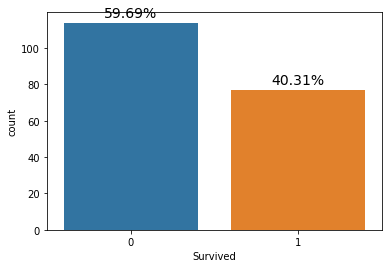

In [45]:
s = sns.countplot(x='Survived', data=test_daten)
sizes: List = []

for patch in s.patches:
    height = patch.get_height()
    sizes.append(height)
    s.text(patch.get_x() + patch.get_width()/2.,
            height + 3,
            '{:1.2f}%'.format(height/len(test_daten)*100),
            ha="center", fontsize=14)

59 % der Passagiere in dem Datensatz sind gestorben und 40% haben überlebt

## Erkennung fehlender Werte

In [46]:
# Hilfsfunktion um fehlende Werte zu erkennen

def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Dein Datensatz hat " + str(df.shape[1]) + " columns.\n"      
            "Es gibt " + str(mis_val_table_ren_columns.shape[0]) +
              " Spalten mit missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

test_missing: DataFrame = missing_values_table(test_daten)
test_missing


Dein Datensatz hat 12 columns.
Es gibt 3 Spalten mit missing values.


,Missing Values,% of Total Values
Cabin,154,80.6
Age,41,21.5
Embarked,2,1.0


Die Variable Cabin hat in 80% der Fälle einen Missing Value
Die Variable Age hat in 21% der Fälle einen Missing Value
Die Variable Embarked hat in 2% der Fälle einen Missing Value

## Visuelle Erkennung fehlender Daten mit der Missingno-Bibliothek

<AxesSubplot:>

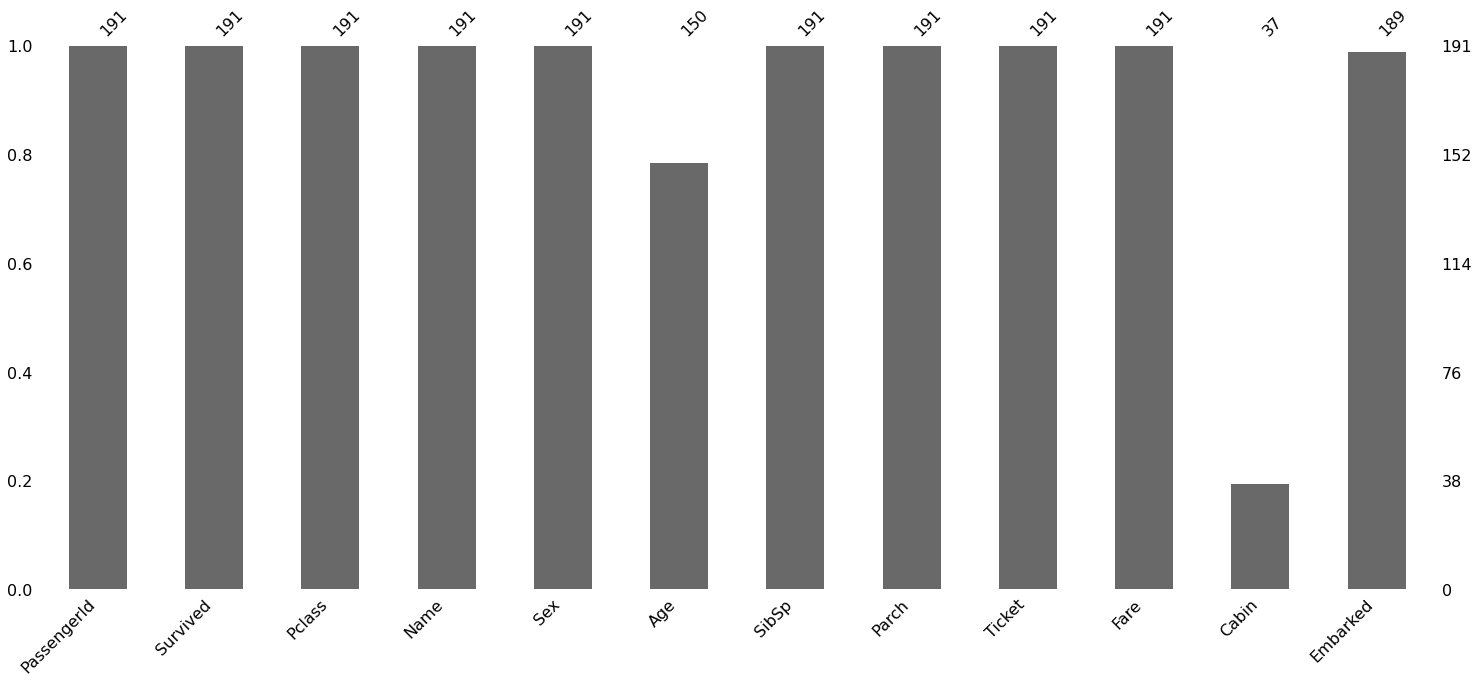

In [47]:
# Barchart für Fehlende Daten
msno.bar(test_daten)

## Suche nach dem Grund für fehlende Daten mithilfe einer Matrixdarstellung


<AxesSubplot:>

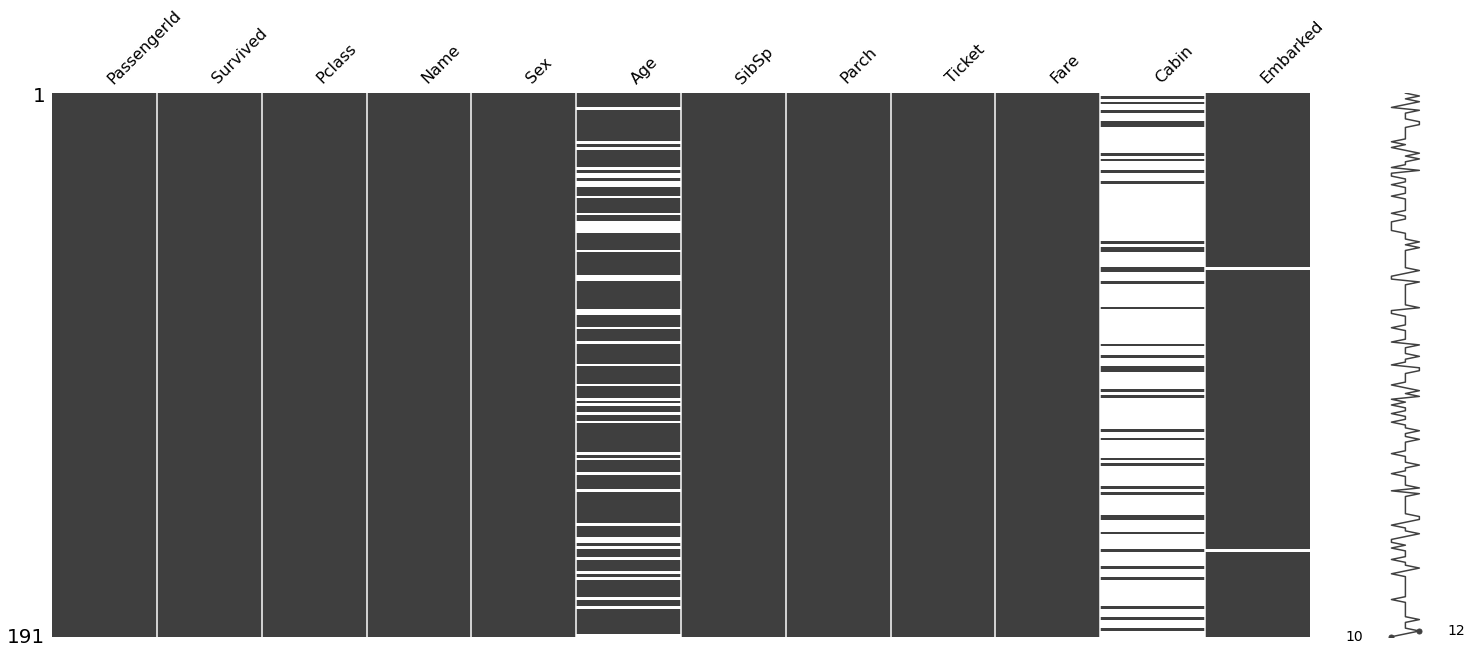

In [48]:
msno.matrix(test_daten)

# Ansicht der matrix sortiert nach Age

<AxesSubplot:>

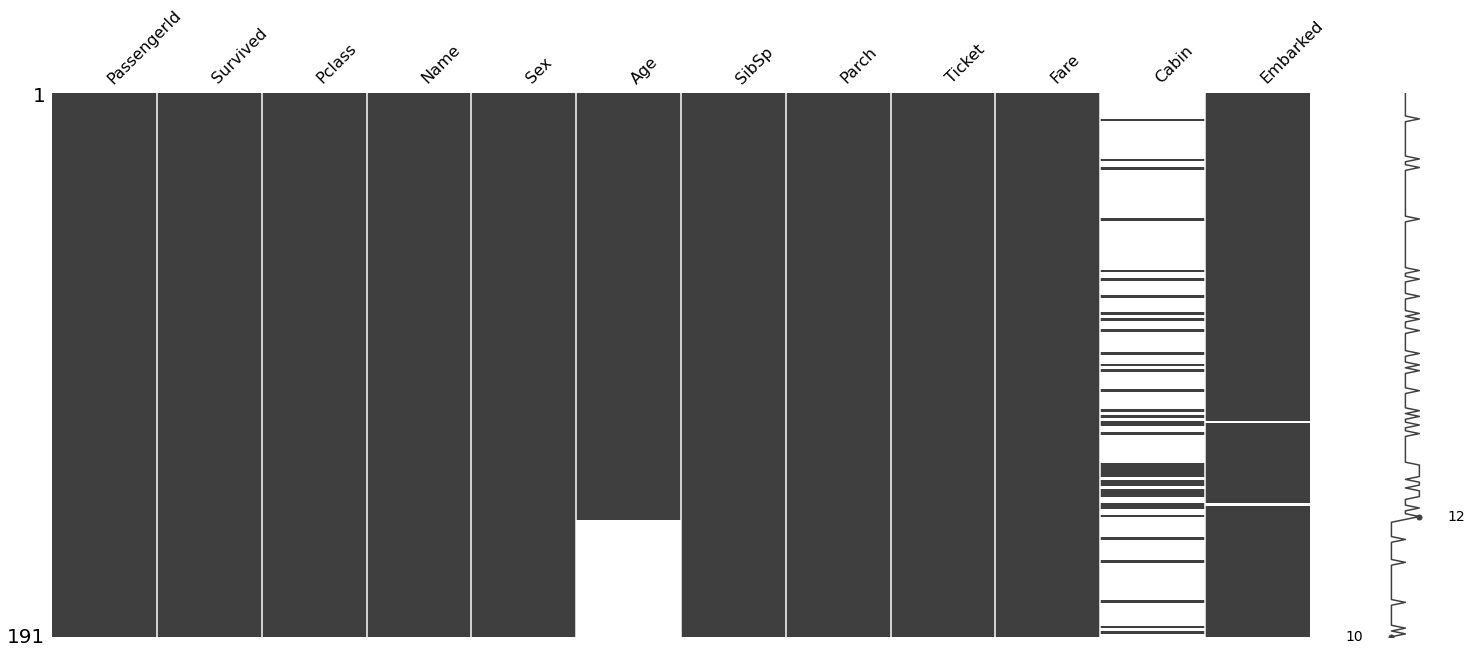

In [49]:
sorted = test_daten.sort_values('Age')
msno.matrix(sorted)

Es ist kein direkter Zusammenhang zwischen den Fehlenden Daten zwischen 'Age', 'Cabin' und 'Embarked' zu erkennen.

## Löschen von Fehlenden Daten

In [50]:
test_daten.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             41
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          154
Embarked         2
dtype: int64

## Zeilenweises Löschen der Daten (Listenweises Löschen/ Dropping rows)

Bei der listenweisen Löschung werden vollständige Zeilen (die die fehlenden Werte enthalten) gelöscht. Daher wird sie auch als vollständige Falllöschung bezeichnet.

In [51]:
test_daten_copy = test_daten.copy()
test_daten_copy['Age'].mean() # pandas skips the missing values and calculates mean of the remaining values.

27.852733333333333

In [53]:
test_daten_copy.dropna(subset=['Age'],how='any',inplace=True)
test_daten_copy['Age'].isnull().sum()

0

In [60]:
print(f"Länge der Originalen Test Daten {len(test_daten)}")
print(f"Länge der Test Daten nach dem Löschen {len(test_daten_copy)}")

Länge der Originalen Test Daten 191
Länge der Test Daten nach dem Löschen 150


Da bei der variable 'age'  41 Missing values vorhanden sind, ist der Test-Datenstatz nach dem Zeilenweisen Löschen kleiner

### Weglassen ganzer Spalten
Da bei der Variable Cabin mehr als 80% aller Eintäge missing values sind, ist es hier nicht gut Zeilenweise zu löschen. Dies
würde bedeuten, dass 80% der daten gelöscht werden.
Daher könnte man überlegen die komplette Spalte zu löschen. Aber auch hier gehen wichtige Informationen verloren, weswegen es
besser ist vor dem Löschen von Daten andere Alternativen zu überprüfen.


## Imputation
Imputation ist das ersetzten von fehlenden Werten (missing values)
Hierbei können verschiedene Methoden wie mean oder constant imputation angewendet werden

In [67]:
# imputing with a constant
test_constant = test_daten.copy()

#setting strategy to 'constant'
mean_imputer = SimpleImputer(strategy='constant') # imputing using constant value
test_constant.iloc[:,:] = mean_imputer.fit_transform(test_constant)
test_constant.isnull().sum()
# Die ersten paar Zeilen des Trainingsdatensatzes
test_constant.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,missing_value,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,missing_value,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,missing_value,S


In [68]:
# Imputing with mean
test_most_frequent = test_daten.copy()

#setting strategy to 'mean' to impute by the mean
# Da es sich bei Cabin um non numeric data handelt wird most frequent und nicht mean verwendet
mean_imputer = SimpleImputer(strategy='most_frequent')
test_most_frequent.iloc[:,:] = mean_imputer.fit_transform(test_most_frequent)
# Die ersten paar Zeilen des Trainingsdatensatzes
test_most_frequent.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B28,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B28,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B28,S


In [69]:
test_most_frequent.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

Es sind keine Missing Values mehr vorhanden

## Fortgeschrittene Imputationstechniken

Bei fortgeschrittenen Imputationsverfahren werden Algorithmen des maschinellen Lernens verwendet, um die fehlenden Werte in einem Datensatz zu imputieren, im Gegensatz zu den vorherigen Verfahren, bei denen wir andere Spaltenwerte zur Vorhersage der fehlenden Werte verwendet haben. In dieser Vorlesung werden wir uns  folgende Technike ansehen:

* [Nearest neighbors imputation](https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)

### K-Nearest Neighbor Imputation

Bei [KNNImputer class](https://scikit-learn.org/stable/modules/impute.html#multivariate-feature-imputation) wird jedes fehlende Merkmal mit Hilfe der Werte von n_Nächsten Nachbarn, die einen Wert für das Merkmal haben, unterstellt. Die Merkmale der Nachbarn werden gleichmäßig gemittelt oder nach der Entfernung zu jedem Nachbarn gewichtet.

In [73]:
test_knn = test_daten.copy(deep=True)

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
test_knn['Age'] = knn_imputer.fit_transform(test_knn[['Age']])

# Die ersten paar Zeilen des Trainingsdatensatzes
test_knn.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [74]:
test_knn['Age'].isnull().sum()

0